In [2]:
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Preprocess data
train_path = 'train/'
valid_path = 'valid/'
test_path = 'test/'

In [4]:
#mobilenet preprocess function scales input images to a range of -1 to 1 instead of 0 to 255
#On top of imagedatagene func we call flow_from_dir func
#test batch uses shuffle in order to later use for plotting confusionmatrix
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 4708 images belonging to 4 classes.
Found 1498 images belonging to 4 classes.
Found 256 images belonging to 4 classes.


In [5]:
model = load_model('model.h5')

In [16]:
#Run this for already saved Model.h5 files

filename='./logs/logEpoch40GPU.csv'
from tensorflow.keras.callbacks import CSVLogger
csvlogger = CSVLogger(filename, separator=',' , append=False)

In [8]:
#Run this for already saved Model.h5 files

#model.fit(X_train, Y_train, callbacks=[csv_logger])
history = model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=1, callbacks=[csvlogger])

Epoch 1/10
471/471 [==============================] - 312s 662ms/step - loss: 0.0061 - accuracy: 0.9983 - val_loss: 0.1885 - val_accuracy: 0.9673
Epoch 2/10
471/471 [==============================] - 337s 716ms/step - loss: 0.0104 - accuracy: 0.9966 - val_loss: 0.1422 - val_accuracy: 0.9766
Epoch 3/10
471/471 [==============================] - 350s 743ms/step - loss: 0.0126 - accuracy: 0.9949 - val_loss: 0.1217 - val_accuracy: 0.9766
Epoch 4/10
471/471 [==============================] - 354s 751ms/step - loss: 0.0127 - accuracy: 0.9955 - val_loss: 0.1180 - val_accuracy: 0.9753
Epoch 5/10
471/471 [==============================] - 342s 726ms/step - loss: 0.0104 - accuracy: 0.9964 - val_loss: 0.1730 - val_accuracy: 0.9720
Epoch 6/10
471/471 [==============================] - 337s 715ms/step - loss: 0.0158 - accuracy: 0.9955 - val_loss: 0.1958 - val_accuracy: 0.9646
Epoch 7/10
471/471 [==============================] - 327s 694ms/step - loss: 0.0110 - accuracy: 0.9955 - val_loss: 0.1892 -

In [27]:
#Run this for already saved Model.h5 files
import pandas as pd
pd.read_csv("./logs/logCPU.csv", index_col='epoch')

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
0,0.998301,0.006096,0.967290,0.188483
1,0.996602,0.010374,0.976636,0.142155
2,0.994902,0.012604,0.976636,0.121707
3,0.995539,0.012657,0.975300,0.117974
4,0.996389,0.010362,0.971963,0.172995
5,0.995539,0.015846,0.964620,0.195850
6,0.995539,0.011032,0.971963,0.189205
7,0.997026,0.010437,0.967290,0.182042
8,0.998088,0.005416,0.948598,0.270164


In [28]:
print(history.history.keys())

AttributeError: 'str' object has no attribute 'history'

In [29]:
#Run this for already saved Model.h5 files
#Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

AttributeError: 'str' object has no attribute 'history'

In [ ]:
#Run this for already saved Model.h5 files
#Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Cross Entropy')
plt.xlabel('epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

In [20]:
#Run this for already saved log files
import pandas as pd
pd.read_csv("./logs/logEpoch40GPU.csv", index_col='epoch')

,accuracy,loss,val_accuracy,val_loss
epoch,,,,
0,0.847738,0.408286,0.489987,1.759878
1,0.987471,0.068289,0.652203,1.016346
2,0.999363,0.020745,0.616155,1.250338
3,1.000000,0.009052,0.627503,1.270067
4,1.000000,0.004996,0.651535,1.216851
5,1.000000,0.003198,0.628838,1.381944
6,1.000000,0.002214,0.642857,1.385410
7,1.000000,0.001568,0.632176,1.499499
8,1.000000,0.001132,0.604139,1.855771


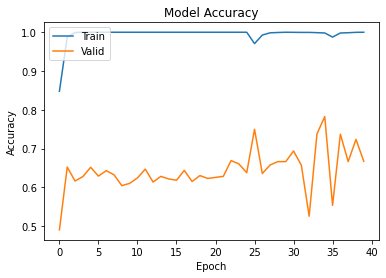

In [25]:
#Run this for already saved log files
#Accuracy
import pandas as pd
import matplotlib.pyplot as plt

file = pd.read_csv('./logs/logEpoch40GPU.csv')
lines = file.plot.line(x='epoch', y=['accuracy', 'val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

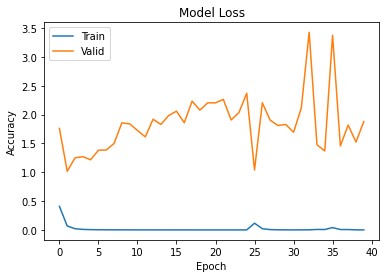

In [26]:
#Run this for already saved log files
#Loss
import pandas as pd
import matplotlib.pyplot as plt

file = pd.read_csv('./logs/logEpoch40GPU.csv')
lines = file.plot.line(x='epoch', y=['loss', 'val_loss'])
plt.title('Model Loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()